In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [8]:
from pprint import pprint


In [9]:
#SET UP URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
query_url = base_url + "&appid=" + weather_api_key + "&q="

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print(f'Beginning Data Retrieval')
print(f'-----------------------------')

for city in cities:
    try:
        response = requests.get(f'{query_url}{city}').json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
        print(f'City not found. Skipping...')
    time.sleep(1)


Beginning Data Retrieval
-----------------------------
Processing Record 1 | hofn
City not found. Skipping...
Processing Record 2 | abu samrah
City not found. Skipping...
Processing Record 3 | punta arenas
Processing Record 4 | tasiilaq
Processing Record 5 | ciudad bolivar
City not found. Skipping...
Processing Record 6 | ushuaia
Processing Record 7 | hermanus
Processing Record 8 | bambous virieux
Processing Record 9 | bredasdorp
Processing Record 10 | rapid valley
City not found. Skipping...
Processing Record 11 | kaitangata
Processing Record 12 | zhmerynka
Processing Record 13 | chokurdakh
Processing Record 14 | puerto ayora
Processing Record 15 | east london
Processing Record 16 | nantucket
Processing Record 17 | albany
Processing Record 18 | alappuzha
Processing Record 19 | port elizabeth
Processing Record 20 | letterkenny
Processing Record 21 | houston
City not found. Skipping...
Processing Record 22 | dikson
Processing Record 23 | busselton
Processing Record 24 | wattegama
Proces

In [29]:

raw_data_df= pd.DataFrame(
                            {
                                "City":city_name,
                                "Lat":lat,
                                "Lng":lng,
                                "Max Temp":max_temp,
                                "Humidity":humidity,
                                "Cloudiness":cloudiness,
                                "Wind Speed":wind_speed,
                                "Country":country,
                                "Date":date
                            }
                         )

raw_data_df.Date = raw_data_df.Date.map(lambda x: '{:.0f}'.format(x))
raw_data_df.Cloudiness = raw_data_df.Cloudiness.map(lambda x: '{:.0f}'.format(x))
raw_data_df.Humidity = raw_data_df.Humidity.map(lambda x: '{:.0f}'.format(x))

raw_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,46.42,53,20,19.57,IS,1665073767
1,Abu Samrah,35.3029,37.1841,79.47,26,0,5.30,SY,1665073769
2,Punta Arenas,-53.1500,-70.9167,44.71,57,75,17.27,CL,1665073772
3,Tasiilaq,65.6145,-37.6368,42.96,72,91,2.17,GL,1665073773
4,Ciudad Bolivar,8.1222,-63.5497,83.48,68,100,4.16,VE,1665073775
5,Ushuaia,-54.8000,-68.3000,46.02,57,75,8.05,AR,1665073777
6,Hermanus,-34.4187,19.2345,58.80,81,78,15.82,ZA,1665073778
7,Bambous Virieux,-20.3428,57.7575,72.21,73,75,10.36,MU,1665073780
8,Bredasdorp,-34.5322,20.0403,61.81,70,100,17.56,ZA,1665073781
9,Rapid Valley,44.0625,-103.1463,44.60,95,100,12.66,US,1665073782


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
raw_data_df.describe()

,Lat,Lng,Max Temp,Wind Speed
count,558.000000,558.000000,558.000000,558.000000
mean,21.066662,15.564471,64.110520,8.619444
std,32.760777,91.859293,19.001432,6.322582
min,-54.800000,-179.166700,8.350000,0.000000
25%,-6.580825,-69.318225,50.177500,4.030000
50%,26.482450,18.022100,67.930000,7.065000
75%,48.886200,97.857075,78.615000,11.500000
max,78.218600,179.316700,108.540000,36.840000


In [22]:
raw_data_df.to_csv("city_data.csv")
raw_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [31]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
raw_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hofn,64.2539,-15.2082,46.42,53,20,19.57,IS,1665073767
1,Abu Samrah,35.3029,37.1841,79.47,26,0,5.30,SY,1665073769
2,Punta Arenas,-53.1500,-70.9167,44.71,57,75,17.27,CL,1665073772
3,Tasiilaq,65.6145,-37.6368,42.96,72,91,2.17,GL,1665073773
4,Ciudad Bolivar,8.1222,-63.5497,83.48,68,100,4.16,VE,1665073775
...,...,...,...,...,...,...,...,...,...
553,Hoa Binh,20.8133,105.3383,75.94,93,8,1.32,VN,1665074572
554,Mata,40.6830,-7.4592,81.61,38,100,1.48,PT,1665074573
555,Kenora,49.8167,-94.4337,36.57,69,75,11.50,CA,1665074574
556,Rocha,-34.4833,-54.3333,58.32,98,100,8.59,UY,1665074576


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

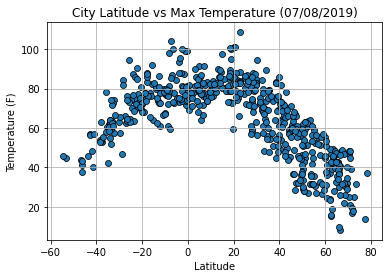

In [24]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()

plt.show()

## Latitude vs. Humidity Plot

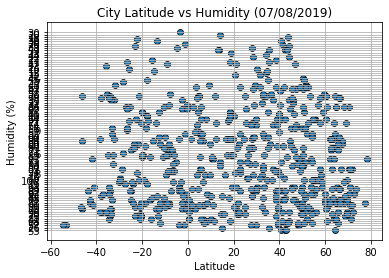

In [26]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Humidity (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

plt.savefig("LatitudeHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

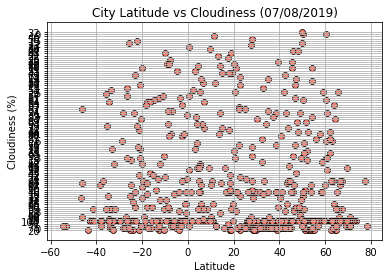

In [27]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Cloudiness"], edgecolor="black", linewidth = .75, color="salmon")
plt.title("City Latitude vs Cloudiness (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

plt.savefig("LatitudeCloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

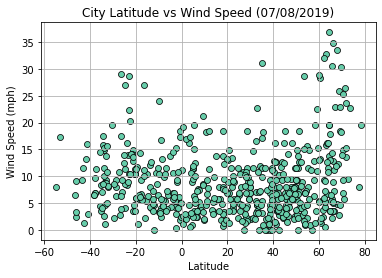

In [28]:
plt.scatter(raw_data_df["Lat"], raw_data_df["Wind Speed"], edgecolor="black", linewidth = .75, color="mediumaquamarine")
plt.title("City Latitude vs Wind Speed (07/08/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("LatitudeWind.png")
plt.show()

## Linear Regression

In [36]:
# Create Northern and Southern Hemisphere DataFrames
north = raw_data_df.loc[raw_data_df['Lat'] >= 0]
south = raw_data_df.loc[raw_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.822


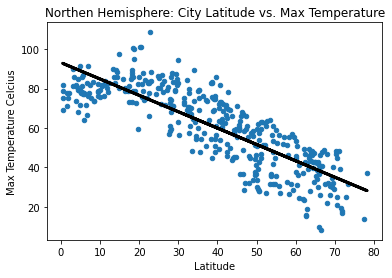

In [37]:
linear_regression = linregress(north['Lat'], north['Max Temp'])
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.733


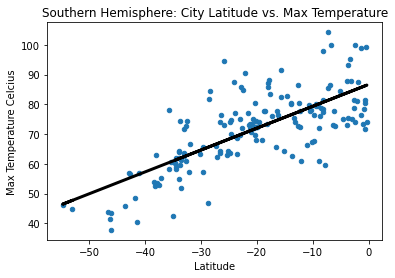

In [43]:
linear_regression = linregress(south['Lat'], south['Max Temp'])
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Max Temp',)
    

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.159


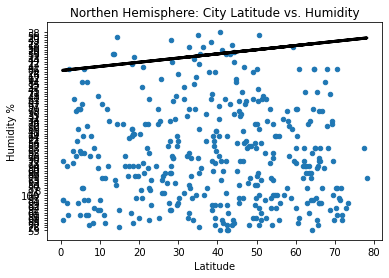

In [46]:
linear_regression = linregress(north["Lat"], north["Humidity"].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.057


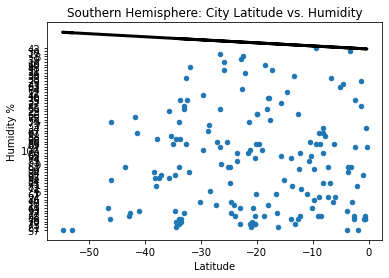

In [47]:
linear_regression = linregress(south['Lat'], south['Humidity'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Humidity',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.141


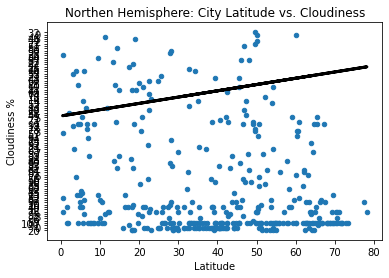

In [48]:
linear_regression = linregress(north['Lat'], north['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.04


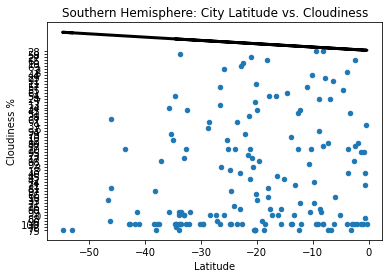

In [50]:
linear_regression = linregress(south['Lat'], south['Cloudiness'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Cloudiness',)

plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.259


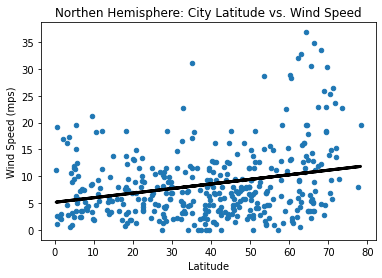

In [51]:
linear_regression = linregress(north['Lat'], north['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * north['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
north.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    north['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.125


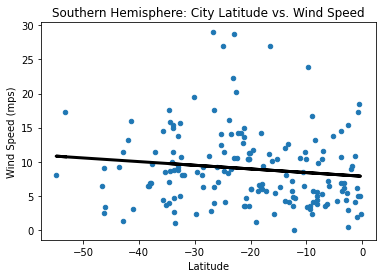

In [52]:
linear_regression = linregress(south['Lat'], south['Wind Speed'].astype('float'))
linear_equation = linear_regression[0] * south['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r-squared is: {round(linear_regression[2],3)}')
south.plot.scatter(
    x = 'Lat',
    y = 'Wind Speed',)
plt.plot(
    south['Lat'],
    linear_equation,
    linewidth = 3,
    color = 'black')
plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mps)')
plt.show()